<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises5_ipynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (22,8)
matplotlib.rcParams.update({'font.size': 22})
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm,t

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e3f0d42f98b76c1a3ea065c7bd08a58bc335ed48978d7bf3fda4c0f8302a0d01
  Stored in directory: /tmp/pip-ephem-wheel-cache-m3gz6vrx/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bvsp = yf.download("^BVSP")[["Adj Close"]]
bvsp

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2020-05-11,79065.000000
2020-05-12,77872.000000
2020-05-13,77772.000000


In [0]:
bvsp['retorno'] = bvsp["Adj Close"].pct_change()
bvsp.dropna(inplace=True)

In [4]:
media_bvsp = bvsp['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_bvsp*100))

Retorno médio = 0.15%


In [5]:
desvio_padrao_bvsp= bvsp['retorno'].std()
print('Desvio padrao = {:.2f}%' .format(desvio_padrao_bvsp*100))

Desvio padrao = 2.28%


In [11]:
bvsp[bvsp['retorno'] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


Qual a probabilidade do bvsp cair mais que 12% considerando que os retornos seguem uma dristribuição normal?

In [14]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_bvsp, scale=desvio_padrao_bvsp)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000476%


In [17]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 21001396 dias
Ou uma vez a cada 83338 anos


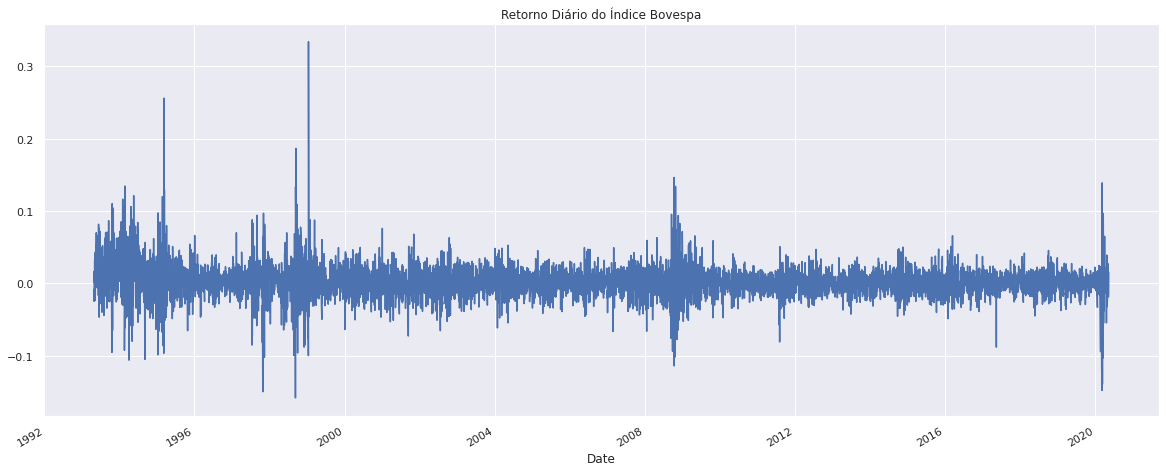

In [35]:
bvsp['retorno'].plot(title="Retorno Diário do Índice Bovespa", figsize=(20, 8));

In [0]:
bvsp['retorno_teorico'] = norm.rvs(size=bvsp['retorno'].size, loc=media_bvsp, scale=desvio_padrao_bvsp)

(-0.2, 0.4)

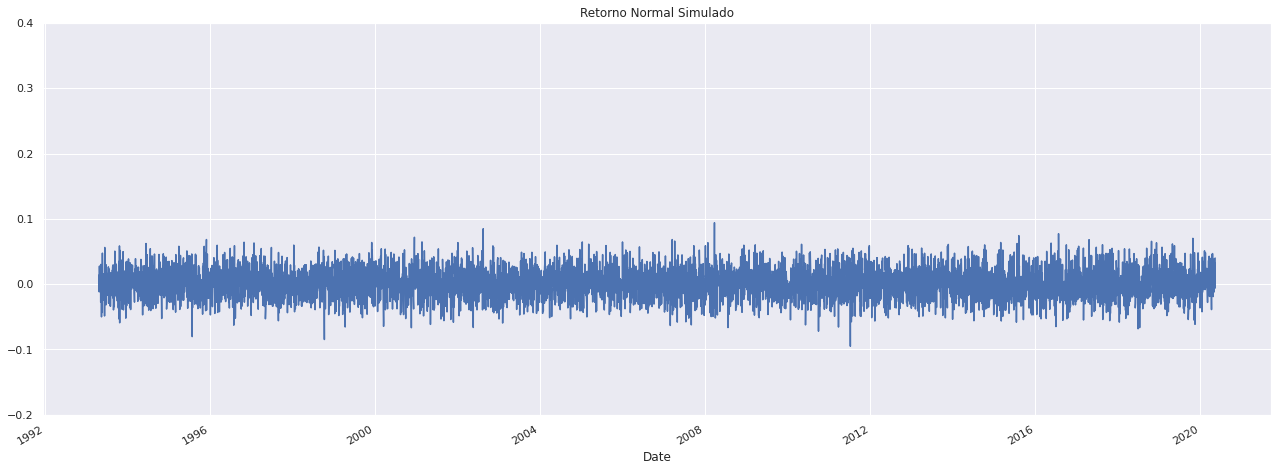

In [46]:
ax = bvsp['retorno_teorico'].plot(title="Retorno Normal Simulado", figsize=(22, 8));
ax.set_ylim(-0.2, 0.4)

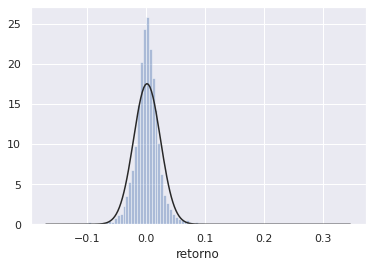

In [49]:
sns.distplot(bvsp['retorno'], bins=100, kde=False, fit=norm);

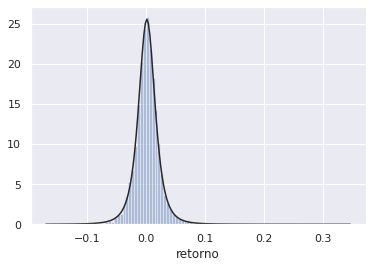

In [50]:
sns.distplot(bvsp['retorno'], bins=100, kde=False, fit=t);

In [52]:
(graus_de_liberdade, media_t, desvio_padrao_t) = t.fit(bvsp['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.24 
Média=0.0012 
Desvio padrão=0.01447


In [53]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade, loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.13360139%


In [55]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 748 dias
Ou uma vez a cada 2 anos


In [57]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a casa {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a casa 21001396 dias
Ou uma vez a cada 83338 anos


In [60]:
frequencia_observada = bvsp['retorno'].size / bvsp[bvsp['retorno'] < -0.12].size
print("Na vida real aconteceu (T-Student no fit=t): \nUma vez a cada {} dias".format(int(round(frequencia_observada, 5))))
print("Impossível calcular baixas probabilidades \ É sobre estar preparado para os Cisnes Negros -Nassim Taleb")

Na vida real aconteceu (T-Student no fit=t): 
Uma vez a cada 446 dias
Impossível calcular baixas probabilidades \ É sobre estar preparado para os Cisnes Negros -Nassim Taleb
